# Shading

## Shading vs. Illumination

### Illumination 
Illumination refers to the math and al
gorithms
necessary to compute the effect of light on a single point in the
scene;    


한 점이 다른 빛으로부터 받는 영향을 계산하는 수학과 알고리즘을 말한다.   
  
### Shading 
Shading deals with techniques that extend the effect of light on a dis
crete
set of points to entire objects.   

이산적인 한 점 뿐만 아니라, 연속적인 객체 전부에 대해서 빛의 효과를 계산하는 방법을 확장시킨 것을 말한다.


### Illumation Equation

$$I_P = I_A + \sum_{i = 1}^{n} I_i \cdot \left[ {{{\langle \vec{N}, \vec{L_i} \rangle} \over {|\vec{N}||\vec{L_i}|}} + \left( {{\langle \vec{R_i}, \vec{V} \rangle} \over {|\vec{R_i}||\vec{V}|}} \right)^s} \right]$$

Ch3에서 Illumination에 대해서 배웠었다. 그리고 해당 지점의 위치와 표면에 대한 법선 벡터만 있다면 지점에서의 광량(Illumintion) 또한 구할 수가 있다. 

위의 Illumination Equation은 포인트의 한 지점에서의 광량이 어떻게 계산되는지를 표현한다.   

### 앞서 배울 내용

The more interesting part, which we’ll explore in this chapter, is how to
extend the “illumination at a point” algorithms we developed into “illumina
tion
at every point of a triangle” algorithms.   

위의 한 점에서의 광량을 계산하는 방법을 확장해, 삼각형 위의 모든 점에 대해 광량(Illumination)을 계산하는 알고리즘을 알아볼 것이다.}

## Flat Shading 

간단하게 시작해보자

1. 삼각형 위의 한 점을 고른다.
2. 해당 점의 광량을 계산한다.
3. 해당 점의 광량이 삼각형위에 다른 점들의 광량과 같다가정한다.
4. 삼각형 전부를 해당 광량을 이용해 Shading한다.

결과는 상당히 좋다.   
삼각형위의 모든 점들은 같은 법선 벡터를 가진다. 물체가 광원과 거리가 멀다면, Light Vector가 대략적으로 평행하게 삼각형 위에 균일하게 들어올 것이다.   

아래의 사진에서 자세히 보면 사각형이 반으로 갈라진(?) 것을 볼 수가 있는데, 빛벡터가 Approximate하게 서로 평행하지 완전 평행하지 않아서 그렇다.   

<img src='https://gabrielgambetta.com/computer-graphics-from-scratch/images/raster-11b.png'>

또한 폴리곤으로 근사해서 만든 구체가 매우 평평해 보이기 때문에 Flat Shading 이라고 한다.

## Gouraud Shading

위처럼 표면이 끊켜 보이지 않게 하려면 어떻게 해야할까?   
한 점에서만 광량을 계산하는 것이 아니라, triangle의 세 개의 Vertex에서 Illumination을 계산하자.   

이처럼하면 각 버텍스마다 0~1 사이인 광량값이 각각 할당되어진다.    
이 상황에서 우리는 Ch8에서 사용했던 DrawShadedTriangle을 이용해 삼각형을 부드럽게 그려낼 수가 있다.   

위에 서술된 것은 Gouraud Shading이라고 불리며, Henri Gouraud 가 1971년에 생각해 냈다고 한다.   
아래에서 적용한 예시를 보여준다.   

<img src='https://gabrielgambetta.com/computer-graphics-from-scratch/images/raster-11c.png'>

큐브가 좀 더 괜찮아 보인다.   
2개의 동일한 버텍스를 가지고 있고 이를 통해서 계산된 광량 또한 일치하기 때문에 그렇다.   

하지만 구는 아직 discontinuous하다. 하지만 이는 놀라운 것이 아니다.   
아래와 같이 Vertex가 같은 위치를 가졌지만 서로 법선 백터가 다르기 때문에 광량이 갑자기 변하게 된다.

<img src='https://gabrielgambetta.com/computer-graphics-from-scratch/images/r16-flat-normals.png'>

잠시 멈춰서, 작은 삼각형 폴리곤들로 구체를 구성한것은 우리의 기술적 한계이고, 나타내려는 물체 자체의 특성이 아님을 기억하자.   
그러니 우리는 물체의 표면이 부드럽게 보이도록 할것이다.   

각 vertex는 구체위의 한점에 대응 시킬 수 있지만, 삼각형은 구체 몸체의 Approximation에 불과하다.   
만약 각 vertex가 삼각형의 법선 벡터가 아닌 구체의 법선벡터를 가진다면 참 좋을 것이다.   

<img src='https://gabrielgambetta.com/computer-graphics-from-scratch/images/r16-sphere-normals.png'>

하지만 큐브는 이와 같은 상황에 해당되지 않는 것을 기억하자.   
큐브모델은 큐브를 상당히 정확하게 표현하고 있다.   

하지만 랜더러가 매 번 원래 표현하려는 물체를 근사한 것인지 아닌지를 알기는 어렵기 때문에, 사용자가 직접 선택할 수 있도록 Trianlge Normal을 모델의 일부로 만들 것이다.   

어떤 오브젝트는 구와같이 버텍스마다 하나의 법선 벡터를 가지고 큐브처럼 그렇지 않은 경우도 존재한다.   
그런이유로 노말벡터는 버텍스의 Attribute(property)가 되기 어렵다. 삼각형의 Attribute가 되어야 한다.   

So we can’t make the normals a property of the vertices; they need to
be a property of the triangles that use them.   

 
<img src='https://gabrielgambetta.com/computer-graphics-from-scratch/images/raster-11d.png'>
큐브는 여전히 큐브같고 구체는 구체같다.  

Gouraud Shading는 반짝이는 물체를 렌더링하기 시작하면 무너져 내린다.   
Specular에 의한 highlight가 현실적이지 못하게 보인다.   

또한 빛이 매우 가까워지기 시작하면 가까운 지점이 엄청 밝게 빛나고 Specular에 의해서 매우 강조 될거으로 예상이되지만, gouraud shading은 정반대로 행동한다.

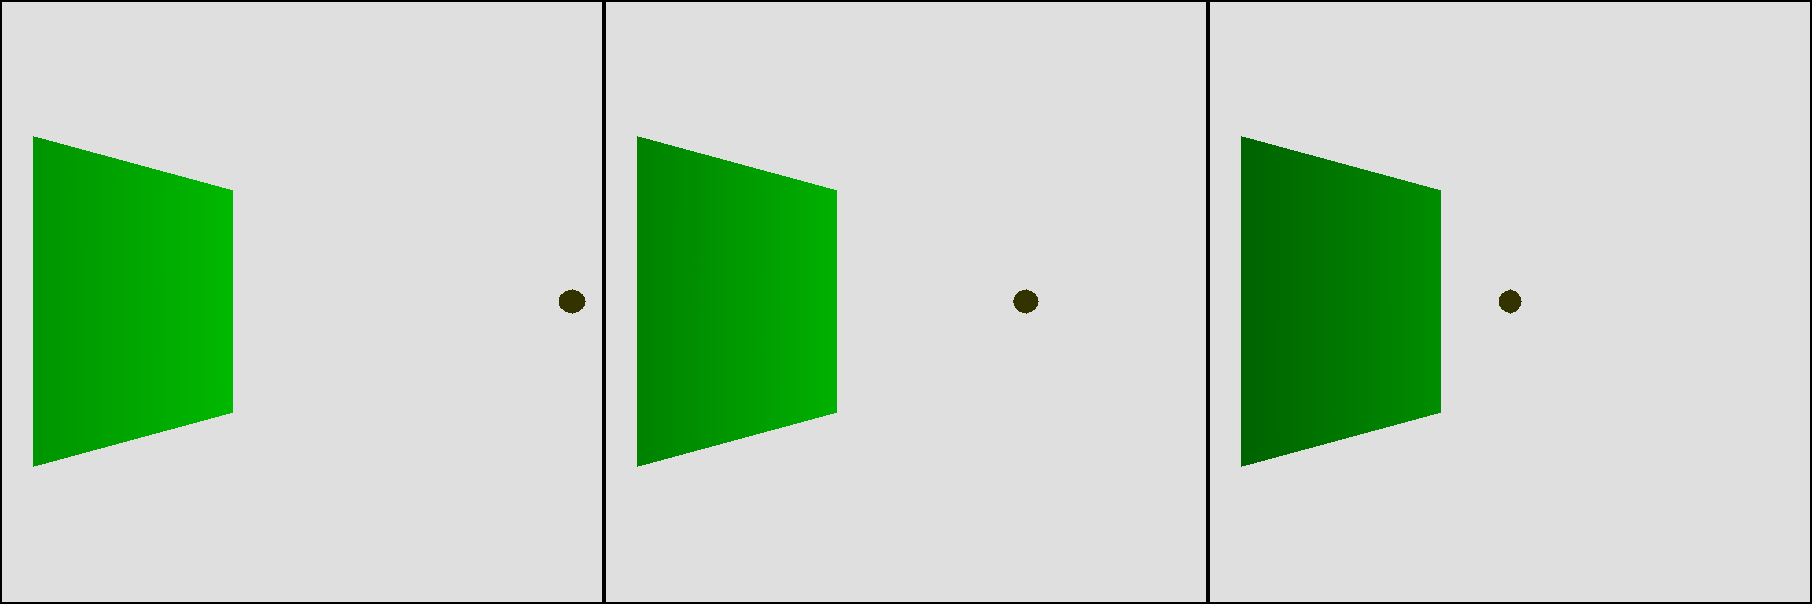
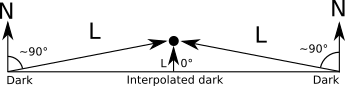